### Exploratory data analysis

There are 5 parts in this notebook. 

- **Part-1: Data overview**
    > check the #samples, #attributes <br>
    > attribute types <br>
    
- **Part-2: Data cleaning**
    > organize attributes into appripriate data types (e.g., numerical, categorical, datatime, text, image, ...) <br>
    > missing value and outlier detection <br>
    
- **Part-3: Data transformation**
    > normalize numerical data <br>
    > transform text data: tokenization, stemming, and lemmatization <br>
    
- **Part-4: Feature engineering**
    > encode categorical data <br>
    > convert DataTime data <br>
    > text feature representation <br>

- **Part-5: Additional analysis**
    > create new features <br>
    > colinearty check <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Part-1: Data overview

In [1]:
# read data from file to a pandas dataframe
# find the file from Canvas --> Modules --> Data
data_df = pd.read_feather('path-to/house_sales.ftr') 
# make sure to change it to your directory

NameError: name 'pd' is not defined

In [3]:
# check the shape of the data frame: row: #samples (short for number of samples), 
#column: #attributes (short for number of attributes)
data_df.shape

(164944, 1789)

In [4]:
# get an overview of the top-n rows
data_df.head()

,Id,Address,Sold Price,Sold On,Summary,Type,Year built,Heating,Cooling,Parking,...,Well Disclosure,remodeled,DOH2,SerialX,Full Baths,Tax Legal Lot Number,Tax Legal Block Number,Tax Legal Tract Number,Building Name,Zip
0,2080183300,"11205 Monterey,","$2,000,000",01/31/20,"11205 Monterey, San Martin, CA 95046 is a sing...",SingleFamily,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,95046
1,20926300,"5281 Castle Rd,","$2,100,000",02/25/21,Spectacular Mountain and incredible L.A. City ...,SingleFamily,1951,Central,"Central Air, Dual","Driveway, Driveway - Brick",...,None,None,None,None,None,None,None,None,None,91011
2,19595300,"3581 Butcher Dr,","$1,125,000",11/06/19,Eichler Style home! with Santa Clara High! in ...,SingleFamily,1954,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",...,None,None,None,None,None,None,None,None,None,95051
3,300472200,"2021 N Milpitas Blvd,","$36,250,000",10/02/20,"2021 N Milpitas Blvd, Milpitas, CA 95035 is a ...",Apartment,1989,Other,No Data,"Mixed, Covered",...,None,None,None,None,None,None,None,None,None,95035
4,2074492000,"LOT 4 Tool Box Spring Rd,","$140,000",10/19/20,Beautiful level lot dotted with pine trees ro...,VacantLand,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,92561


### Part-2: Data cleaning

#### 2.1: check missing values

In [105]:
null_sum = data_df.isnull().sum()
null_sum

Id                             0
Address                        0
Sold Price                    85
Sold On                        0
Summary                     3117
                           ...  
Tax Legal Lot Number      164943
Tax Legal Block Number    164943
Tax Legal Tract Number    164943
Building Name             164943
Zip                            0
Length: 1789, dtype: int64

In [106]:
# Drop columns that have at least 30% missing values 
data_df.drop(columns=data_df.columns[null_sum > len(data_df) * 0.3], inplace=True)

In [69]:
# check the remaining columns
data_df.shape, data_df.columns

((164944, 32),
 Index(['Id', 'Address', 'Sold Price', 'Sold On', 'Summary', 'Type',
        'Year built', 'Heating', 'Cooling', 'Parking', 'Bedrooms', 'Bathrooms',
        'Total interior livable area', 'Total spaces', 'Garage spaces',
        'Home type', 'Region', 'Elementary School', 'Elementary School Score',
        'Elementary School Distance', 'High School', 'High School Score',
        'High School Distance', 'Heating features', 'Parking features',
        'Lot size', 'Parcel number', 'Tax assessed value', 'Annual tax amount',
        'Listed On', 'Listed Price', 'Zip'],
       dtype='object'))

In [70]:
# check the data types
data_df.dtypes 

Id                             object
Address                        object
Sold Price                     object
Sold On                        object
Summary                        object
Type                           object
Year built                     object
Heating                        object
Cooling                        object
Parking                        object
Bedrooms                       object
Bathrooms                      object
Total interior livable area    object
Total spaces                   object
Garage spaces                  object
Home type                      object
Region                         object
Elementary School              object
Elementary School Score        object
Elementary School Distance     object
High School                    object
High School Score              object
High School Distance           object
Heating features               object
Parking features               object
Lot size                       object
Parcel numbe

#### 2.2: organize columns into different data types
The .dtype attribute shows that the current data type for each column is "object", this is either because the column contains missing values or because it contains values of different types.   

We will organize the columns into the following common data types based on the observation (decide the data type based on its values):
- Categorical: 
    > Id, Type, Home type, Region, Elementary School, High School, Parcel number, Zip <br>
- Numerical: 
    > Sold Price, Bedrooms, Bathrooms, Total interior livable area, Total spaces, Garage spaces, Elementary School Score, Elementary School Distance, High School Score, High School Distance, Lot size, Tax assessed value, Annual tax amount, Listed Price <br>
- DateTime: 
    > Sold On, Year built, Listed On <br>
- String/Text: 
    > Address, Summary, Heating, Cooling, Parking, Heating features, Parking features <br>

In the following part, we will: 
- convert the original data into the organized data type 
- do data processing for the converted data

#### 2.3: process categorical data

In [107]:
# Convert the following columns to categorical data types 
cat_col = ['Id', 'Type', 'Home type', 'Region', 'Elementary School', 'High School', 'Parcel number', 'Zip']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,Id,Type,Home type,Region,Elementary School,High School,Parcel number,Zip
0,2080183300,SingleFamily,SingleFamily,San Martin,Rucker Elementary School,Christopher High School,NaN,95046
1,20926300,SingleFamily,SingleFamily,La Canada Flintridge,Mountain Avenue Elementary School,Crescenta Valley High School,5870016003,91011
2,19595300,SingleFamily,SingleFamily,Santa Clara,Pomeroy Elementary School,Santa Clara High School,29022100,95051
3,300472200,Apartment,Apartment,Milpitas,Joseph Weller Elementary School,Milpitas High School,02201015,95035
4,2074492000,VacantLand,NaN,Mountain Center,Mcsweeny Elementary School,West Valley High School,NaN,92561
...,...,...,...,...,...,...,...,...
164939,72555199,Condo,Condo,Richmond,Washington Elementary School,Kennedy High School,5607700878,94804
164940,94643599,Condo,Condo,Los Angeles,Charles H. Kim Elementary School,NaN,5503030207,90010
164941,300479799,Condo,Condo,Mountain View,Edith Landels Elementary School,Mountain View High School,16088037,94043
164942,15504399,SingleFamily,SingleFamily,Pacifica,Cabrillo Elementary School,Jefferson High School,022402090,94044


In [72]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

Id                   category
Type                 category
Home type            category
Region               category
Elementary School    category
High School          category
Parcel number        category
Zip                  category
dtype: object

**2.3.1: check outliers of each categorical feature**
- Here we take the "Type" column as an example to show the logics

In [73]:
# count the #samples fall into each category
data_df['Type'].value_counts() 

SingleFamily                        102040
Condo                                27443
MultiFamily                           7346
Townhouse                             7108
VacantLand                            6199
                                     ...  
Low-Rise (1-3), Full, Unit Above         1
Low-Rise (1-3), Ground Floor             1
Low-Rise (1-3), Live/Work                1
Low-Rise (1-3), Semi-Attached            1
Hi-Rise (9+), Studio                     1
Name: Type, Length: 317, dtype: int64

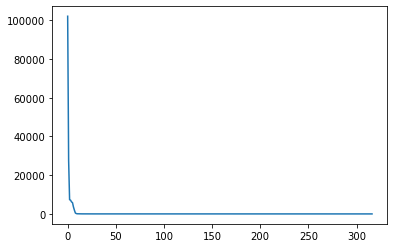

In [12]:
# an alternative method to check the #samples in each category
plt.plot(data_df['Type'].value_counts().values)

In [13]:
# a closer look at the #samples in each category
data_df['Type'].value_counts().values

array([102040,  27443,   7346,   7108,   6199,   5849,   3605,   1922,
          463,    176,     76,     56,     51,     48,     42,     27,
           21,     19,     19,     19,     18,     15,     14,     14,
           13,     13,     13,     12,     12,     12,     11,     11,
           10,     10,     10,      9,      9,      8,      8,      7,
            7,      7,      7,      7,      7,      6,      6,      6,
            6,      6,      6,      6,      6,      5,      5,      5,
            5,      5,      5,      5,      5,      5,      5,      4,
            4,      4,      4,      4,      4,      4,      4,      4,
            4,      4,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      2,      2,      2,
            2,      2,      2,      2,      2,      2,      2,      2,
            2,      2,      2,      2,      2,      2,      2,      2,
      

According to the above observation, we take categories that only have a small #samples as outlier/minority categories. There are typically two ways to deal with the outliers: 
- We can directly remove the outlier categories
- We can also merge the minority categories with majority ones (example shown below)

In [108]:
# remove samples whose "Type" belongs to the minority categories 
# our criteria here is to remove categories that have less than 10 samples
value_cts = data_df['Type'].value_counts()
cat_to_remove = value_cts[value_cts < 10].keys()
cat_to_remove

CategoricalIndex(['RURLRES', 'Full',
                  'Luxury, New Construction, Mid-Rise (4-8)',
                  'SINGLE, RURLRES', '4+ Story', 'Apartments', '2 Story, Full',
                  'Junior', '1 Story', 'Luxury, 2 Level',
                  ...
                  '1 Level, Top Floor, Unit Below, Flat', 'Leased Land',
                  '1 Level, Top Floor, Unit Below',
                  '1 Level, Top Floor, Low-Rise (1-3), Full, Attached',
                  'Low-Rise (1-3), End Unit',
                  'Low-Rise (1-3), Full, Unit Above',
                  'Low-Rise (1-3), Ground Floor', 'Low-Rise (1-3), Live/Work',
                  'Low-Rise (1-3), Semi-Attached', 'Hi-Rise (9+), Studio'],
                 categories=['1 Level', '1 Level, Attached', '1 Level, Flat', '1 Level, Flat, Low-Rise (1-3)', '1 Level, Flat, Low-Rise (1-3), Unit Above', '1 Level, Ground Floor', '1 Level, Low-Rise (1-3)', '1 Level, Low-Rise (1-3), Full, Unit Above, Attached', ...], ordered=False, dtype

In [109]:
print("Data size before dropping minority categories:", data_df.shape)
data_df.drop(data_df[data_df['Type'].isin(cat_to_remove)].index, inplace=True)
print("Data size after dropping minority categories:", data_df.shape)

Data size before dropping minority categories: (164944, 32)
Data size after dropping minority categories: (164401, 32)


In [110]:
# double check the remaining categories 
data_df['Type'].astype('string').value_counts()
# check what happens if not using astype('string') in the above expression?

SingleFamily            102040
Condo                    27443
MultiFamily               7346
Townhouse                 7108
VacantLand                6199
Unknown                   5849
MobileManufactured        3605
Apartment                 1922
Single Family              463
Cooperative                176
Residential Lot             76
Single Family Lot           56
MFD-F                       51
Acreage                     48
2 Story                     42
3 Story                     27
Hi-Rise (9+), Luxury        21
Duplex                      19
RESIDENTIAL                 19
Condominium                 19
Mid-Rise (4-8)              18
31                          15
Vacant Land                 14
Hi-Rise (9+)                14
Low-Rise (1-3)              13
Detached                    13
Manufactured Home           13
Mobile Home                 12
3 Story, Duplex             12
Detached, 2 Story           12
Top Floor                   11
Residential Sub Lot         11
ACREAGE 

In [77]:
# check what happens if not using astype('string') in the above expression?
data_df['Type'].value_counts()

SingleFamily               102040
Condo                       27443
MultiFamily                  7346
Townhouse                    7108
VacantLand                   6199
                            ...  
Detached, Full                  0
Detached, Fixer Upper           0
Detached, 4+ Story              0
Detached, 3 Story, Full         0
Hi-Rise (9+), Studio            0
Name: Type, Length: 317, dtype: int64

In [111]:
# merge minority categories with majority ones (e.g., SINGLE --> SingleFamily, Lots/Land-->VacantLand)
data_df['Type'].replace(['SINGLE', 'Lots/Land'],['SingleFamily', 'VacantLand'], inplace=True)

In [112]:
# In the resulting categories, 'SINGLE' is merged with "SingleFamily" and 'Lots/Land' is merged with 'VacantLand'
data_df['Type'].value_counts()

SingleFamily            102050
Condo                    27443
MultiFamily               7346
Townhouse                 7108
VacantLand                6209
Unknown                   5849
MobileManufactured        3605
Apartment                 1922
Single Family              463
Cooperative                176
Residential Lot             76
Single Family Lot           56
MFD-F                       51
Acreage                     48
2 Story                     42
3 Story                     27
Hi-Rise (9+), Luxury        21
Duplex                      19
Condominium                 19
RESIDENTIAL                 19
Mid-Rise (4-8)              18
31                          15
Vacant Land                 14
Hi-Rise (9+)                14
Low-Rise (1-3)              13
Detached                    13
Manufactured Home           13
Mobile Home                 12
Detached, 2 Story           12
3 Story, Duplex             12
Residential Sub Lot         11
Top Floor                   11
ACREAGE 

#### 2.3.2: apply the logic for processing the "Type" column to process the following columns:
- Region
- Elementary School
- High School
- Home type

*Notes:*
- One can decide whether to remove outliers or the specific outlier threshold based on your observation and common sense. 
- One can also decide whether it makes sense to merge multiple categories and what categories to merge.

**analyze "Region"**

In [113]:
data_df['Region'].value_counts() 

Los Angeles      32800
San Jose         18464
San Francisco    15272
Sunnyvale         2721
San Mateo         2540
                 ...  
Valley Home          1
Inskip               1
Innes                1
Hyland Park          1
Los Feliz            1
Name: Region, Length: 1433, dtype: int64

(array([1.203e+03, 9.100e+01, 3.800e+01, 3.000e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 5.000e+00, 3.000e+00, 2.000e+00]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

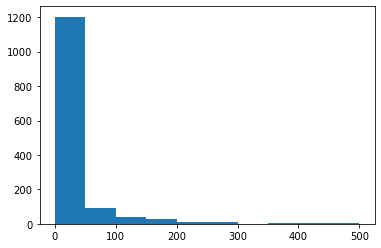

In [114]:
#value counts in the Region
region_val = data_df['Region'].value_counts().values
plt.hist(region_val, range=[0, 500])

(array([127.,  90.,  56.,  36.,  24.,  20.,  20.,  23.,  17.,  25.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

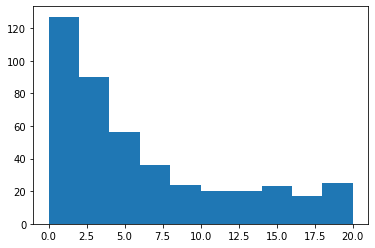

In [116]:
plt.hist(region_val, range=[0, 20])

In [117]:
counts_reg = data_df['Region'].value_counts() 
counts_reg.tail(50)

Coyote                1
Tucson                1
Cromberg              1
Forks Of Salmon       1
Trowbridge            1
Firestone Park        1
Trinity Pines         1
Fell                  1
Fair Oaks Ranch       1
Travis Afb            1
El Portal             1
East Nicolaus         1
Douglass Hills        1
Duncans Mills         1
Dove Canyon           1
Usfs                  1
Cherokee              1
Homeland Rd           1
Villa Grande          1
Lyndon                1
Lockhart              1
Lincoln Acres         1
Leona Valley          1
Toms Place            1
Calif Hot Spirings    1
Larissa               1
W Hollywood           1
Lake Sherwood         1
Lake Gregory          1
Lake California       1
Ladera Heights        1
Seiad                 1
Kyburz                1
View                  1
Century City          1
Vidal                 1
Shell Beach           1
Vicente               1
Shelter Cove          1
Kew                   1
Juniper Hills         1
Jose            

In [118]:
value_cts2 = data_df['Region'].value_counts()
cat_to_remove2 = value_cts2[value_cts2 <= 5].keys()
cat_to_remove2

CategoricalIndex(['Capistrano Beach', 'Big Bend', 'Hidden Hills',
                  'San Gregorio', 'Vernon', 'Rimrock', 'Highland Park',
                  'Salton City', 'Arrowbear Lake', 'Silverado Canyon',
                  ...
                  'Juniper Hills', 'Jose', 'Capilola', 'Jonesville',
                  'Johanasburg', 'Valley Home', 'Inskip', 'Innes',
                  'Hyland Park', 'Los Feliz'],
                 categories=['Acampo', 'Acton', 'Adelanto', 'Adin', 'Agoura Hills', 'Agua Dulce', 'Aguanga', 'Ahwahnee', ...], ordered=False, dtype='category', length=273)

In [119]:
print("Data size before dropping minority region categories:", data_df.shape)
data_df.drop(data_df[data_df['Region'].isin(cat_to_remove2)].index, inplace=True)
print("Data size after dropping minority region categories:", data_df.shape)

Data size before dropping minority region categories: (164401, 32)
Data size after dropping minority region categories: (163811, 32)


In [120]:
counts_reg2 = data_df['Region'].astype('string').value_counts()
counts_reg2.tail(50)

Pinecrest               8
Phillipsville           8
Mira Loma               8
Seeley                  8
Bay Point               8
Burson                  8
San Lucas               8
Cantua Creek            8
Ludlow                  8
Tomales                 8
Pt Arena                8
Weott                   8
Agua Dulce              8
Brooks                  8
Drytown                 7
Ravendale               7
Pahrump                 7
Callahan                7
Westley                 7
Comptche                7
Amargosa Valley         7
Port Costa              7
Los Angeles City        7
Wendel                  7
Bermuda Dunes           7
Hyampom                 7
Palos Verdes Estates    7
Leggett                 7
Loma Mar                7
Woody                   7
Nipton                  7
Rumsey                  6
Camp Connell            6
Navarro                 6
Butte Meadows           6
South Dos Palos         6
Blairsden Graeagle      6
Lennox                  6
Sherwood For

I chose not to merge any categories as these does not indicate major categories but regions. I removed any region containing less than 5 entries because from the histograms it seemed like 5 indicates a good boundary as the value counts after 5 seem to be close between 5-10 counts. But I chose not to merge any because I do not want to lose geographical information.

**analyze "Elementary School"**

In [121]:
data_df['Elementary School'].value_counts() 

Daniel Webster Elementary School     1344
Sherman Elementary School             960
Laurel Elementary School              859
Warner Avenue Elementary School       833
McKinley Elementary School            794
                                     ... 
Fletcher Walker Elementary School       0
El Nido Elementary School               0
Honeydew Elementary School              0
Grand Island Elementary School          0
Travis Elementary School                0
Name: Elementary School, Length: 3643, dtype: int64

In [122]:
es_val = data_df['Elementary School'].value_counts().values
es_val

array([1344,  960,  859, ...,    0,    0,    0])

(array([1808.,  644.,  228.,  165.,  117.,   64.,   58.,   53.,   45.,
          46.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

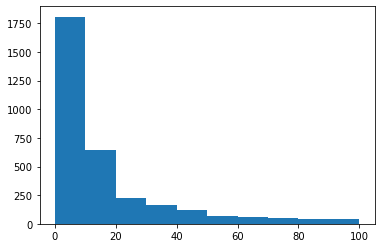

In [123]:
plt.hist(es_val, range=[0, 100])

(array([376., 475., 644., 313., 316., 130., 137.,  61.,  94.,  72.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

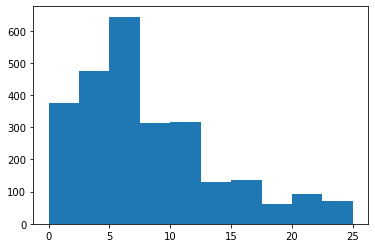

In [129]:
plt.hist(es_val, range=[0, 25])

In [125]:
counts_es = data_df['Elementary School'].value_counts() 
counts_es

Daniel Webster Elementary School     1344
Sherman Elementary School             960
Laurel Elementary School              859
Warner Avenue Elementary School       833
McKinley Elementary School            794
                                     ... 
Fletcher Walker Elementary School       0
El Nido Elementary School               0
Honeydew Elementary School              0
Grand Island Elementary School          0
Travis Elementary School                0
Name: Elementary School, Length: 3643, dtype: int64

In [126]:
counts_es.tail(50)

Indian Springs Elementary School         1
Endeavour Elementary School              1
Nixon (Patricia) Elementary School       1
Allendale Elementary School              1
Pueblo Vista Magnet Elementary School    1
Arbolita Elementary School               1
Granite Pointe Elementary School         1
Ann Street Elementary School             1
Mckittrick Elementary School             1
Julia B. Morrison Elementary School      1
Angier Elementary School                 1
Juarez-Lincoln Elementary School         1
Don Pedro Elementary School              1
Grass Valley Elementary School           1
Coronado                                 1
Sharp Avenue Elementary School           1
White Rock Elementary School             1
Tom Maloney Elementary School            1
Island Elementary School                 1
San Marcos Elementary School             1
Spanos (Alex G.) Elementary School       1
Raffaello Palla Elementary School        1
Garden Village Elementary School         1
New Jerusal

In [127]:
value_cts3 = data_df['Elementary School'].value_counts()
cat_to_remove3 = value_cts3[value_cts3 <= 10].keys()
cat_to_remove3

CategoricalIndex(['Mcpherson Elementary School', 'Bing Wong Elementary School',
                  'Golden Hills Elementary School',
                  'La Fetra Elementary School', 'Mesquite Elementary School',
                  'Olive Street Elementary School',
                  'Dunsmore Elementary School',
                  'Alice Birney Elementary School',
                  'La Mirada Elementary School',
                  'Jack London Elementary School',
                  ...
                  'Hermosa Drive Elementary School',
                  'Troth Street Elementary School',
                  'Cooley Ranch Elementary School',
                  'Sandra J. Gallardo Elementary School',
                  'Elk Hills Elementary School',
                  'Fletcher Walker Elementary School',
                  'El Nido Elementary School', 'Honeydew Elementary School',
                  'Grand Island Elementary School',
                  'Travis Elementary School'],
                 cate

In [128]:
print("Data size before dropping minority Elementary School categories:", data_df.shape)
data_df.drop(data_df[data_df['Elementary School'].isin(cat_to_remove3)].index, inplace=True)
print("Data size after dropping minority Elementary School categories:", data_df.shape)

Data size before dropping minority Elementary School categories: (163811, 32)
Data size after dropping minority Elementary School categories: (153783, 32)


In [130]:
counts_reg3 = data_df['Elementary School'].astype('string').value_counts()
counts_reg3.tail(50)

Boulder Ridge Elementary                     11
Hidden Valley Elementary School              11
Ynez Elementary School                       11
San Fernando Elementary School               11
Riley Elementary School                      11
Robert Semple Elementary School              11
Orange Elementary School                     11
Richland Elementary                          11
Fay Elementary School                        11
Cantua Elementary School                     11
Laguna Road Elementary School                11
H. Clarke Powers Elementary School           11
Walnut Canyon Elementary School              11
Patterson Elementary School                  11
Vinedale Elementary School                   11
Chatsworth Park Elementary School            11
Sybil N. Crookham Elementary School          11
Freese Elementary School                     11
Canalino Elementary School                   11
John Stallings Elementary School             11
Raisin City Elementary School           

Similar to the Region category, I chose not to merge any elementary school categories as these do not indicate major category titles but individual Elementary School names. I removed any school that contains less than 10 entries because from the histograms it seemed like 10 indicates a good boundary as the value counts after 10 seem to be close between 10-20 counts. But I chose not to merge any because I do not want to lose school name information.

**analyze "High School"**

In [131]:
data_df['High School'].value_counts()

Fairfax Senior High School               3594
University Senior High School Charter    3491
Independence High School                 2898
Harbor High School                       2372
Belmont Senior High School               2116
                                         ... 
Ceres High School                           0
Murrieta Mesa High School                   0
Sierra Vista High School                    0
Etiwanda High School                        0
Desert Junior-Senior High School            0
Name: High School, Length: 946, dtype: int64

In [132]:
hs_val = data_df['High School'].value_counts().values
hs_val

array([3594, 3491, 2898, 2372, 2116, 1721, 1685, 1616, 1586, 1569, 1525,
       1420, 1410, 1389, 1388, 1384, 1373, 1357, 1294, 1293, 1265, 1261,
       1216, 1188, 1138, 1122, 1104, 1101, 1090, 1008, 1003,  987,  971,
        962,  940,  937,  936,  935,  935,  931,  927,  907,  888,  872,
        864,  863,  851,  827,  820,  808,  808,  797,  790,  787,  782,
        768,  755,  740,  738,  718,  694,  691,  691,  688,  684,  684,
        678,  649,  609,  577,  549,  549,  548,  543,  530,  525,  521,
        521,  520,  497,  493,  489,  481,  470,  462,  447,  437,  436,
        428,  427,  425,  421,  414,  402,  388,  376,  350,  349,  338,
        338,  321,  307,  307,  293,  291,  271,  259,  256,  255,  255,
        254,  252,  250,  245,  244,  242,  241,  238,  230,  228,  227,
        213,  211,  207,  205,  204,  194,  193,  192,  176,  175,  171,
        169,  165,  164,  164,  164,  162,  162,  161,  159,  158,  156,
        153,  153,  151,  149,  148,  146,  146,  1

(array([156., 119., 107., 109.,  88.,  50.,  39.,  45.,  13.,  24.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

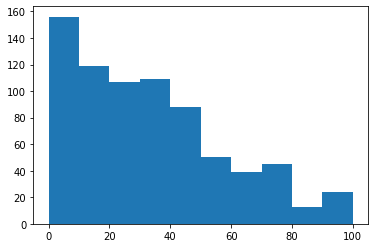

In [133]:
plt.hist(hs_val, range=[0, 100])

(array([103.,  53.,  69.,  50.,  55.,  52.,  42.,  67.,  52.,  43.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

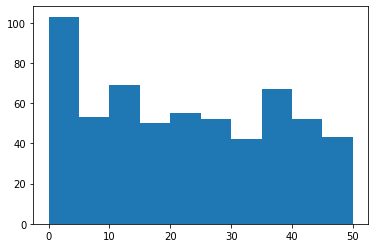

In [137]:
plt.hist(hs_val, range=[0, 50])

In [138]:
counts_hs = data_df['High School'].value_counts() 
counts_hs

Fairfax Senior High School               3594
University Senior High School Charter    3491
Independence High School                 2898
Harbor High School                       2372
Belmont Senior High School               2116
                                         ... 
Ceres High School                           0
Murrieta Mesa High School                   0
Sierra Vista High School                    0
Etiwanda High School                        0
Desert Junior-Senior High School            0
Name: High School, Length: 946, dtype: int64

In [139]:
counts_hs.tail(50)

Imperial High School                                       1
Folsom High School                                         1
Da Vinci Communications High                               1
Out of Maricopa Cnty                                       1
Norwalk High School                                        1
John H. Glenn High School                                  1
Nevada Union High School                                   1
North Valley High School                                   1
Felicitas And Gonzalo Mendez High                          1
Fontana High School                                        1
Florin High School                                         0
Hillcrest High School                                      0
Panorama High School                                       0
Woodcreek High School                                      0
Fountain Valley High School                                0
Arleta High School                                         0
Monterey Trail High Scho

In [140]:
value_cts4 = data_df['High School'].value_counts()
cat_to_remove4 = value_cts4[value_cts4 < 15].keys()
cat_to_remove4

CategoricalIndex(['Tokay High School', 'Corning High School',
                  'Hamilton High School', 'Manteca High School',
                  'Elk Grove High School', 'Sunnyside High School',
                  'King-Chavez Community High School', 'Rocklin High School',
                  'Silver Springs High (Continuation) School',
                  'Bassett Senior High School',
                  ...
                  'South Fork Junior - Senior High School',
                  'Weston Ranch High School', 'El Diamante High School',
                  'Westwood High School', 'Whale Gulch High School',
                  'Ceres High School', 'Murrieta Mesa High School',
                  'Sierra Vista High School', 'Etiwanda High School',
                  'Desert Junior-Senior High School'],
                 categories=['Abraham Lincoln High School', 'Abraham Lincoln Senior High School', 'Academy For Multiligual Arts And Science At Mervyn M. Dymally High', 'Acalanes High School', 'Adelan

In [141]:
print("Data size before dropping minority High School categories:", data_df.shape)
data_df.drop(data_df[data_df['High School'].isin(cat_to_remove4)].index, inplace=True)
print("Data size after dropping minority High School categories:", data_df.shape)

Data size before dropping minority High School categories: (153783, 32)
Data size after dropping minority High School categories: (152461, 32)


In [143]:
counts_reg4 = data_df['High School'].astype('string').value_counts()
counts_reg4.tail(50)

Jurupa Valley High School             19
Mclane High School                    19
Riverbank High School                 19
Arroyo Valley High School             19
Chaffey High School                   19
Del Campo High School                 19
Mira Costa High School                18
Cajon High School                     18
Arlington High School                 18
Analy High School                     18
Loara High School                     18
Jordan High School                    18
Cosumnes Oaks High School             18
Frontier High School                  18
Lynwood High School                   18
Oroville High School                  17
San Lorenzo High School               17
Antioch High School                   17
Lindhurst High School                 17
Woodlake High School                  17
Parlier High School                   17
Selma High School                     17
Seaside High School                   17
Rosemead High School                  16
Armijo High Scho

Similar to the Region and Elementary School categories, I chose not to merge any high school titles as these do not indicate major category titles but individual high school names. I removed any school that contains less than 15 entries. This time, instead of trusting the histogram values, I decided to follow the array that contains value counts because I had a clear view of the counts. Again, I chose not to merge any because I do not want to lose school name information.

**Analyze Home type**

In [144]:
# The category distribution for "Home type" seems reasonable 
# We will just use it as it is without further processing
data_df['Home type'].value_counts()

SingleFamily          93683
Condo                 26401
MultiFamily            7038
Townhouse              6630
Unknown                5652
MobileManufactured     3370
Apartment              1905
Cooperative             176
Name: Home type, dtype: int64

#### 2.4: process numerical data

In [145]:
num_col = ['Sold Price', 'Bathrooms', 'Total interior livable area', 'Total spaces', 'Garage spaces', 
           'Elementary School Score', 'Elementary School Distance', 'High School Score', 'High School Distance', 
           'Lot size', 'Tax assessed value', 'Annual tax amount', 'Listed Price']

Convert currency from string format (e.g., $1,000,000) to float. 

In [146]:
currency = ['Sold Price', 'Listed Price', 'Tax assessed value', 'Annual tax amount']
for c in currency:
    data_df[c] = data_df[c].replace(r'[$,-]', '', regex=True).replace(r'^\s*$', np.nan, regex=True).astype(float)

Convert areas from string format such as 1000 sqft and 1 Acres to float as well. 

In [147]:
areas = ['Total interior livable area', 'Lot size']
for c in areas:
    # attribute measured by Acres
    acres = data_df[c].str.contains('Acres') == True
    
    # e.g., 13,168 sqrt --> 13168
    col = data_df[c].replace(r'\b sqft\b|\b Acres\b|\b,\b','', regex=True).astype(float)
    
    # Acres --> sqft
    col[acres] *= 43560
    
    data_df[c] = col

Now we can convert the numerical columns to the "float" data type 

In [148]:
data_df[num_col] = data_df[num_col].astype('float')
data_df[num_col]

,Sold Price,Bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Lot size,Tax assessed value,Annual tax amount,Listed Price
0,2000000.0,2.0,2000.0,0.0,0.0,6.0,0.7,6.0,1.4,NaN,NaN,NaN,NaN
1,2100000.0,3.0,2806.0,2.0,2.0,9.0,0.4,9.0,1.2,13168.0,1829308.0,22330.0,1950000.0
2,1125000.0,2.0,1517.0,2.0,2.0,4.0,0.6,6.0,0.8,4795.0,1125000.0,13472.0,1299888.0
3,36250000.0,0.0,98052.0,175.0,175.0,7.0,0.4,9.0,0.9,178596.0,14521205.0,175211.0,NaN
4,140000.0,NaN,NaN,NaN,NaN,3.0,23.8,5.0,25.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164939,563527.0,2.0,959.0,0.0,0.0,3.0,2.5,2.0,1.3,2178.0,486031.0,8243.0,548000.0
164940,2650000.0,3.0,2400.0,2.0,2.0,6.0,0.5,NaN,NaN,53578.8,2757060.0,33279.0,2750000.0
164941,1357000.0,NaN,1355.0,2.0,2.0,7.0,1.2,8.0,2.1,1651.0,1356661.0,16427.0,NaN
164942,1400000.0,3.0,2227.0,0.0,0.0,7.0,2.0,4.0,6.2,5401.0,272767.0,4165.0,1398000.0


In [149]:
# the following columns now all have the numerical data types
data_df[num_col].dtypes

Sold Price                     float64
Bathrooms                      float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Elementary School Score        float64
Elementary School Distance     float64
High School Score              float64
High School Distance           float64
Lot size                       float64
Tax assessed value             float64
Annual tax amount              float64
Listed Price                   float64
dtype: object

Before moving forward, we will first deal with columns that contain missing values

In [150]:
# check the missing values of "Sold Price"
data_df['Sold Price'].isna().sum()

82

In [151]:
# we will drop samples where the "Sold Price" is missing
data_df.drop(data_df[data_df['Sold Price'].isna()].index, inplace=True)

In [152]:
# for the other numerical columns, we will fill in missing values with the mean of that column
for col in num_col:
    if col != "Sold Price":
        data_df[col].fillna(value = data_df[col].mean(), inplace=True)

In [153]:
# descriptive statistics for the numerical columns
data_df[num_col].describe()
# If the describe() function is applied on non-numerical columns, the statistics won't make sense.

,Sold Price,Bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Lot size,Tax assessed value,Annual tax amount,Listed Price
count,1.523790e+05,152379.000000,1.523790e+05,152379.000000,152379.000000,152379.000000,152379.000000,152379.000000,152379.000000,1.523790e+05,1.523790e+05,1.523790e+05,1.523790e+05
mean,1.234534e+06,2.303340,3.296294e+03,1.677602,1.593980,5.676052,1.274108,6.100050,2.583214,9.222054e+05,9.300686e+05,1.173671e+04,1.245990e+06
std,3.433726e+06,1.563009,4.520746e+05,29.163494,29.145935,1.971683,2.710583,1.897106,3.794419,1.272647e+08,3.044196e+06,3.734927e+04,2.589732e+06
min,1.000000e+00,0.000000,1.000000e+00,-26.000000,-26.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.500000e+05,2.000000,1.216000e+03,0.000000,0.000000,4.000000,0.300000,5.000000,0.900000,5.196000e+03,3.200000e+05,4.334500e+03,6.490000e+05
50%,8.430000e+05,2.000000,1.675000e+03,1.000000,1.000000,5.676052,0.600000,6.100050,1.600000,7.701000e+03,7.100000e+05,9.315000e+03,1.200000e+06
75%,1.410000e+06,3.000000,2.602000e+03,2.000000,2.000000,7.000000,1.274108,7.000000,2.583214,8.015040e+04,9.869230e+05,1.253000e+04,1.245990e+06
max,8.660000e+08,256.000000,1.764164e+08,9999.000000,9999.000000,10.000000,76.400000,10.000000,77.800000,4.856770e+10,8.256328e+08,9.977342e+06,6.250000e+08


According to the descriptive statistics, multiple columns have outliers:
- Bathrooms, Total interior livable area, Total spaces, Garage spaces, Lot size

We will analyze them separately.

#### 2.4.1: Analyze "Bathrooms"

<AxesSubplot:xlabel='Bathrooms'>

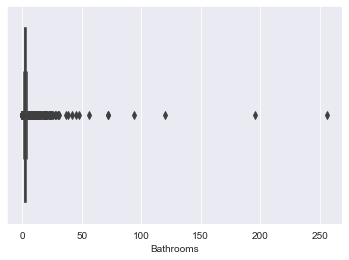

In [154]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['Bathrooms'], orient='h')

In [156]:
Q1 = np.percentile(data_df['Bathrooms'], 25)
Q3 = np.percentile(data_df['Bathrooms'], 75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(Q1, Q3, lower_thresh, upper_thresh)

2.0 3.0 0.5 4.5


In [157]:
# Based on the above calculation, we will remove samples that have "Bathrooms" strictly above 5 (>5) as outliers
data_df.drop(data_df[data_df['Bathrooms'] > 5].index, inplace=True)
data_df.shape

(149497, 32)

<AxesSubplot:xlabel='Bathrooms', ylabel='Count'>

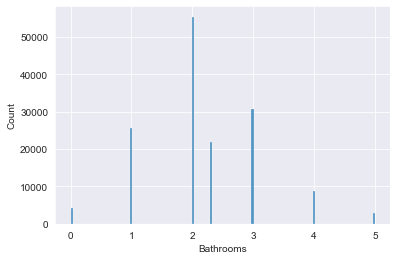

In [158]:
# check the new distribution of the "Bathrooms"
sns.histplot(data_df['Bathrooms'])

#### 2.4.2: apply the logic for processing the "Bathroom" column to process the following columns:
- Total interior livable area 
- Total spaces 
- Garage spaces 
- Lot size

*Notes:*
- One can decide the upper/lower threshold of removing outliers, it doesn't have to be the exact upper/lower threshold calculated from the boxplot. 

**Analyze "Total interior livable area"**

<AxesSubplot:xlabel='Total interior livable area'>

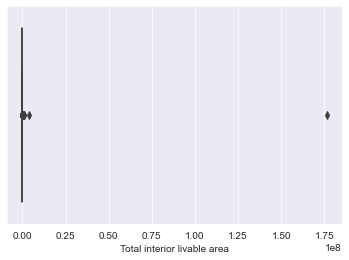

In [159]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['Total interior livable area'], orient='h')

In [160]:
Q1 = data_df['Total interior livable area'].quantile(0.25)
Q3 = data_df['Total interior livable area'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1208.0, 2510.0, -745.0, 4463.0)

In [161]:
data_df.shape

(149497, 32)

In [162]:
data_df.drop(data_df[data_df['Total interior livable area'] > 5000].index, inplace=True)
data_df.shape

(147965, 32)

<AxesSubplot:xlabel='Total interior livable area', ylabel='Count'>

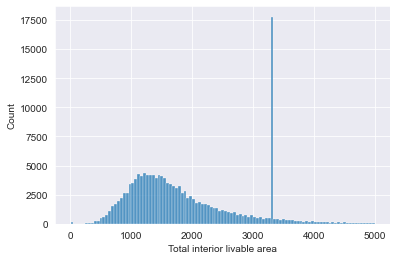

In [163]:
# check the new distribution of the "Total interior livable area"
sns.histplot(data_df['Total interior livable area'])

**Analyze "Total spaces"**

<AxesSubplot:xlabel='Total spaces'>

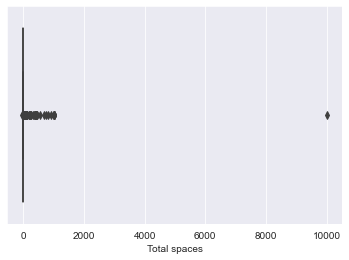

In [164]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['Total spaces'], orient='h')

In [165]:
Q1 = data_df['Total spaces'].quantile(0.25)
Q3 = data_df['Total spaces'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.0, 2.0, -3.0, 5.0)

In [166]:
data_df.shape

(147965, 32)

In [167]:
data_df.drop(data_df[data_df['Total spaces'] > 5].index, inplace=True)
data_df.shape

(144806, 32)

In [171]:
data_df.drop(data_df[data_df['Total spaces'] < 0].index, inplace=True)
data_df.shape

(144801, 32)

<AxesSubplot:xlabel='Total spaces', ylabel='Count'>

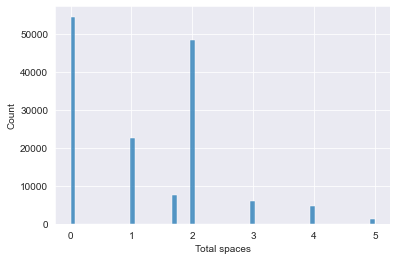

In [172]:
sns.histplot(data_df['Total spaces'])

**Analyze "Garage spaces"**

<AxesSubplot:xlabel='Garage spaces'>

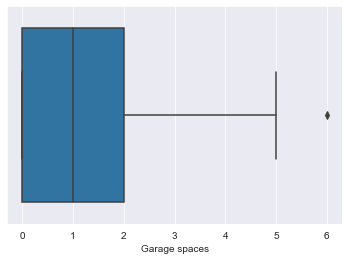

In [176]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['Garage spaces'], orient='h')

In [177]:
Q1 = data_df['Garage spaces'].quantile(0.25)
Q3 = data_df['Garage spaces'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.0, 2.0, -3.0, 5.0)

In [178]:
data_df.shape

(144801, 32)

In [179]:
data_df.drop(data_df[data_df['Garage spaces'] > 5].index, inplace=True)
data_df.shape

(144800, 32)

In [180]:
data_df.drop(data_df[data_df['Garage spaces'] < 0].index, inplace=True)
data_df.shape

(144800, 32)

<AxesSubplot:xlabel='Garage spaces', ylabel='Count'>

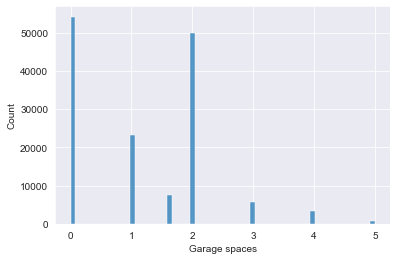

In [182]:
sns.histplot(data_df['Garage spaces'])

**Analyze "Lot size"**

<AxesSubplot:xlabel='Lot size'>

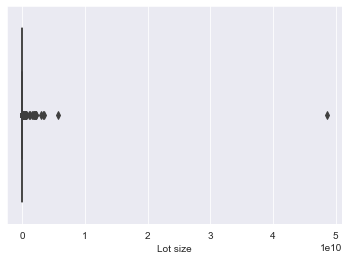

In [183]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['Lot size'], orient='h')

In [184]:
Q1 = data_df['Lot size'].quantile(0.25)
Q3 = data_df['Lot size'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(5100.0, 86248.8, -116623.20000000001, 207972.0)

In [185]:
data_df.shape

(144800, 32)

In [189]:
data_df.drop(data_df[data_df['Lot size'] > 207972].index, inplace=True)
data_df.shape

(112741, 32)

In [187]:
data_df.drop(data_df[data_df['Lot size'] < 0].index, inplace=True)
data_df.shape

(112741, 32)

<AxesSubplot:xlabel='Lot size', ylabel='Count'>

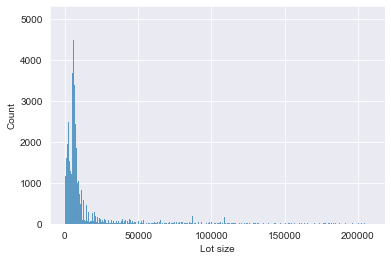

In [190]:
sns.histplot(data_df['Lot size'])

### Part-3: Data transformation
After performing data cleaning for each data type separately, we will move forward to do data transformation for each data type.

#### 3.1: Normalize numerical data

In [ ]:
# Total interior livable area, Total spaces, Garage spaces, Lot size

<AxesSubplot:xlabel='Total interior livable area', ylabel='Count'>

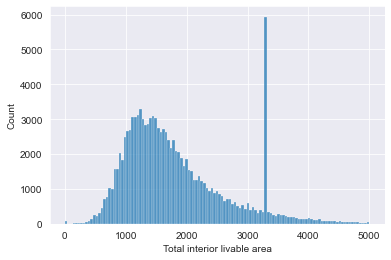

In [191]:
# check the distribution of the "Total interior livable area" (before normalization)
sns.histplot(data_df['Total interior livable area'])

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_df['Total interior livable area_normalized'] = scaler.fit_transform(data_df[['Total interior livable area']].values)

<AxesSubplot:xlabel='Total interior livable area_normalized', ylabel='Count'>

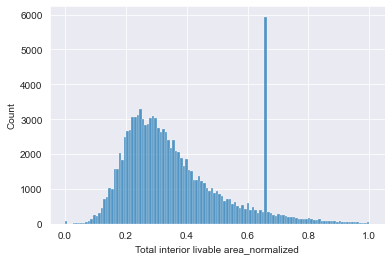

In [193]:
# check the distribution of the "Total interior livable area" (after normalization)
sns.histplot(data_df['Total interior livable area_normalized'])

Compare the data distribution before VS after normalization, we can see that:
- normalization does not change the shape and distribution of the data
- the absolute values of the data are changed, but the relative values do not change
- after normalization, it's more intuitive to understand the relative value among all samples

#### 3.1.1: apply the logic for processing the "Total interior livable area" column to process the following columns:
- Total spaces 
- Garage spaces 
- Lot size

**Analyze "Total spaces"**

<AxesSubplot:xlabel='Total spaces', ylabel='Count'>

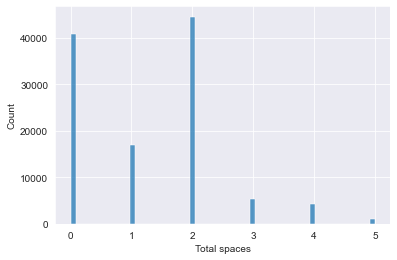

In [194]:
sns.histplot(data_df['Total spaces'])

In [195]:
data_df['Total spaces_normalized'] = scaler.fit_transform(data_df[['Total spaces']].values)

<AxesSubplot:xlabel='Total spaces_normalized', ylabel='Count'>

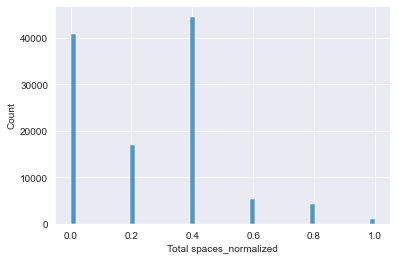

In [196]:
sns.histplot(data_df['Total spaces_normalized'])

**Analyze "Garage spaces"**

<AxesSubplot:xlabel='Garage spaces', ylabel='Count'>

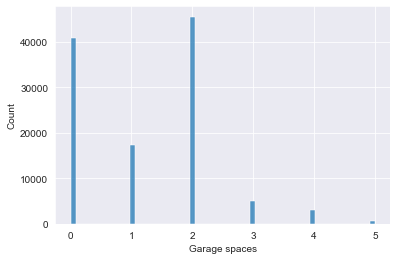

In [197]:
sns.histplot(data_df['Garage spaces'])

In [198]:
data_df['Garage spaces_normalized'] = scaler.fit_transform(data_df[['Garage spaces']].values)

<AxesSubplot:xlabel='Garage spaces_normalized', ylabel='Count'>

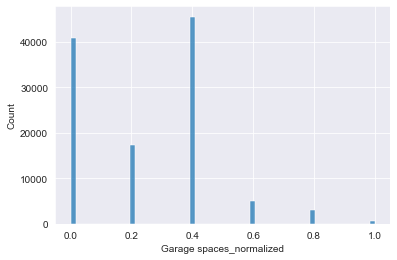

In [199]:
sns.histplot(data_df['Garage spaces_normalized'])

**Analyze "Lot size"**

<AxesSubplot:xlabel='Lot size', ylabel='Count'>

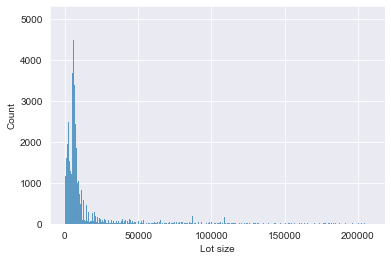

In [200]:
sns.histplot(data_df['Lot size'])

In [201]:
data_df['Lot size_normalized'] = scaler.fit_transform(data_df[['Lot size']].values)

<AxesSubplot:xlabel='Lot size_normalized', ylabel='Count'>

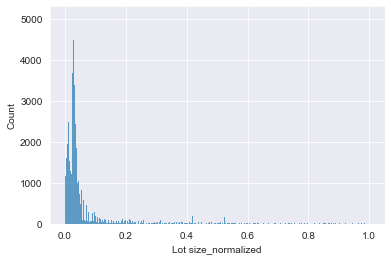

In [202]:
sns.histplot(data_df['Lot size_normalized'])

**Additional analysis**: for attributes with large values, we typically apply log scaling to process.

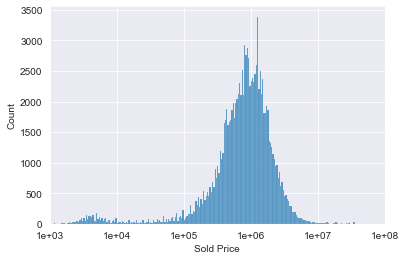

In [203]:
# Check the histogram of the 'Sold Price' after apply log scaling.
ax = sns.histplot(np.log10(data_df['Sold Price']))
ax.set_xlim([3, 8])
ax.set_xticks(range(3, 9))
ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()]);

# feel free to explore what will happen without log scaling

<AxesSubplot:xlabel='Sold Price', ylabel='Count'>

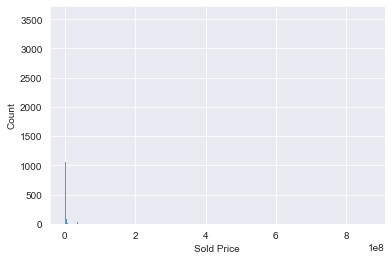

In [204]:
sns.histplot(data_df['Sold Price'])

#### 3.2: Text transformation 
- tokenization, stemming, lemmatization

In [205]:
import nltk

In [206]:
text_col = ['Address', 'Summary', 'Heating', 'Cooling', 'Parking', 'Heating features', 'Parking features']

In [207]:
data_df[text_col]

,Address,Summary,Heating,Cooling,Parking,Heating features,Parking features
1,"5281 Castle Rd,",Spectacular Mountain and incredible L.A. City ...,Central,"Central Air, Dual","Driveway, Driveway - Brick",Central,"Driveway, Driveway - Brick"
2,"3581 Butcher Dr,",Eichler Style home! with Santa Clara High! in ...,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered","Forced air, Gas","Garage, Garage - Attached, Covered"
5,"4707 La Villa Mari UNIT J,",AGENTS READ PRIVATE REMARKS BEFORE CALLING; S...,Central,None,Garage - Attached,Forced air,Garage - Attached
6,"7517 Deveron Ct,",This lovely rental is located in the prestigio...,"Forced air, Gas",Central,"Garage, Garage - Attached, Covered","Forced air, Gas","Garage, Garage - Attached, Covered"
7,"3025 E 8th St,","3025 E 8th St, Los Angeles, CA 90023 is a sing...",Wall,Wall/Window Unit(s),"Garage, Covered",Wall,"Garage, Covered"
...,...,...,...,...,...,...,...
164939,"88 Lakeshore Ct,",STUNNING LAKE VIEW AND BAY VIEW! Exquisite Res...,"Baseboard, Electric",None,"Carport, Covered, Guest","Baseboard, Electric","Carport, Covered, Guest"
164940,"3785 Wilshire Blvd PENTHOUSE 3,",Arguably the best unit at Solair. This top flo...,Central,Central,Covered,Other,Covered
164941,"312 Circuit Way,","312 Circuit Way, Mountain View, CA 94043 is a ...",Other,No Data,"Garage, Garage - Attached, Covered",Other,"Garage, Garage - Attached, Covered"
164942,"2 Cape Breton Ct,",Park Pacifica CHECK OUT THE VIDEO Entering Ca...,Central Forced Air - Gas,None,"Underground/Basement, Garage - Attached","Forced air, Gas","Underground/Basement, Garage - Attached"


#### 3.2.1: Example analysis for the "Summary" column

**tokenization**: the process of breaking down text into the smallest unit in a sentence (e.g., tokens can be words, numbers, punctuation marks)

In [208]:
from nltk import sent_tokenize
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/sukaraca/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sukaraca/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sukaraca/nltk_data...


True

In [209]:
# take the "Summary" from the first sample as an example
text = data_df.iloc[0]['Summary']
text

'Spectacular Mountain and incredible L.A. City Skyline Views. This elegant building is located in a quiet residential area. A circular driveway leads you to this elegant beautiful home. This warm and private house features three bedrooms and three baths. Spacious formal Living room, dinning room and a high ceiling family room with a wet bar.  Remodeled  kitchen with granite counter top and cozy breakfast area. The sliding doors open to a very private backyard with generous deck,fire pit, swimming pool, Spa, grass area and LA views. The master bedroom and other two bedrooms on the one side of the house. Upper level loft perfect for a den or office with doors leading to the balcony you can enjoy the incredible view!'

In [210]:
nltk.sent_tokenize(text)

['Spectacular Mountain and incredible L.A. City Skyline Views.',
 'This elegant building is located in a quiet residential area.',
 'A circular driveway leads you to this elegant beautiful home.',
 'This warm and private house features three bedrooms and three baths.',
 'Spacious formal Living room, dinning room and a high ceiling family room with a wet bar.',
 'Remodeled  kitchen with granite counter top and cozy breakfast area.',
 'The sliding doors open to a very private backyard with generous deck,fire pit, swimming pool, Spa, grass area and LA views.',
 'The master bedroom and other two bedrooms on the one side of the house.',
 'Upper level loft perfect for a den or office with doors leading to the balcony you can enjoy the incredible view!']

In [211]:
print(nltk.word_tokenize(text))

['Spectacular', 'Mountain', 'and', 'incredible', 'L.A.', 'City', 'Skyline', 'Views', '.', 'This', 'elegant', 'building', 'is', 'located', 'in', 'a', 'quiet', 'residential', 'area', '.', 'A', 'circular', 'driveway', 'leads', 'you', 'to', 'this', 'elegant', 'beautiful', 'home', '.', 'This', 'warm', 'and', 'private', 'house', 'features', 'three', 'bedrooms', 'and', 'three', 'baths', '.', 'Spacious', 'formal', 'Living', 'room', ',', 'dinning', 'room', 'and', 'a', 'high', 'ceiling', 'family', 'room', 'with', 'a', 'wet', 'bar', '.', 'Remodeled', 'kitchen', 'with', 'granite', 'counter', 'top', 'and', 'cozy', 'breakfast', 'area', '.', 'The', 'sliding', 'doors', 'open', 'to', 'a', 'very', 'private', 'backyard', 'with', 'generous', 'deck', ',', 'fire', 'pit', ',', 'swimming', 'pool', ',', 'Spa', ',', 'grass', 'area', 'and', 'LA', 'views', '.', 'The', 'master', 'bedroom', 'and', 'other', 'two', 'bedrooms', 'on', 'the', 'one', 'side', 'of', 'the', 'house', '.', 'Upper', 'level', 'loft', 'perfect',

**Stemming**: apply rule-based method (e.g., cut the suffixes in words) to find the root of the word

In [212]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
word = ("leaves") 
ps.stem(word)

'leav'

**lemmatization**: use lexical based knowledge to get the base forms of words

In [213]:
import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("leaves")

'leaf'

In [214]:
# combine tokenization and lemmatization together
word_list = nltk.word_tokenize(text)
word_lem = [lemmatizer.lemmatize(tok) for tok in word_list]
print(word_lem)

['Spectacular', 'Mountain', 'and', 'incredible', 'L.A.', 'City', 'Skyline', 'Views', '.', 'This', 'elegant', 'building', 'is', 'located', 'in', 'a', 'quiet', 'residential', 'area', '.', 'A', 'circular', 'driveway', 'lead', 'you', 'to', 'this', 'elegant', 'beautiful', 'home', '.', 'This', 'warm', 'and', 'private', 'house', 'feature', 'three', 'bedroom', 'and', 'three', 'bath', '.', 'Spacious', 'formal', 'Living', 'room', ',', 'dinning', 'room', 'and', 'a', 'high', 'ceiling', 'family', 'room', 'with', 'a', 'wet', 'bar', '.', 'Remodeled', 'kitchen', 'with', 'granite', 'counter', 'top', 'and', 'cozy', 'breakfast', 'area', '.', 'The', 'sliding', 'door', 'open', 'to', 'a', 'very', 'private', 'backyard', 'with', 'generous', 'deck', ',', 'fire', 'pit', ',', 'swimming', 'pool', ',', 'Spa', ',', 'grass', 'area', 'and', 'LA', 'view', '.', 'The', 'master', 'bedroom', 'and', 'other', 'two', 'bedroom', 'on', 'the', 'one', 'side', 'of', 'the', 'house', '.', 'Upper', 'level', 'loft', 'perfect', 'for',

### Part-4: Feature Engineering

#### 4.1: Numerical data
- directly use the values

#### 4.2: Categorical data
- encoding (one-hot/ordinal encoder)

In [215]:
# we will use the "Home type" column as an example to show the encoding logics
data_df['Home type'].value_counts()

SingleFamily          81787
Condo                 14902
Townhouse              5639
MultiFamily            5126
Unknown                3260
Apartment              1053
MobileManufactured      935
Cooperative              39
Name: Home type, dtype: int64

In [216]:
from sklearn.preprocessing import OneHotEncoder

In [217]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_df[['Home type']])

OneHotEncoder(handle_unknown='ignore')

In [218]:
# the categories learned during the fit process
ohe.categories_

[array(['Apartment', 'Condo', 'Cooperative', 'MobileManufactured',
        'MultiFamily', 'SingleFamily', 'Townhouse', 'Unknown'],
       dtype=object)]

In [219]:
# encode the "Home type" with the learned categories during the fit process
ohe.transform(data_df[['Home type']]).toarray()[0]

array([0., 0., 0., 0., 0., 1., 0., 0.])

In [220]:
# convert the original "Home type" column to the encoded categories
pd.DataFrame(ohe.transform(data_df[['Home type']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,Apartment,Condo,Cooperative,MobileManufactured,MultiFamily,SingleFamily,Townhouse,Unknown
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
112736,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
112737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
112738,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
112739,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [221]:
# An alternative but not recommended approach
# This method does not fit in a standard ML pipeline, the encoding can't transform from training to testing data
pd.get_dummies(data_df['Home type']).head()

,Apartment,Condo,Cooperative,MobileManufactured,MultiFamily,SingleFamily,Townhouse,Unknown
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0


#### 4.3: Date-time
- generate a corresponding feature list such as: [year, month, day]

In [222]:
data_col = ['Sold On', 'Year built', 'Listed On']

In [223]:
# we will use the "Sold On" column as an example to show the processing logics
data_df.iloc[:10]['Sold On']

1     02/25/21
2     11/06/19
5     02/24/21
6     08/31/19
7     11/06/19
8     01/30/21
10    01/13/21
11    12/18/20
12    04/30/20
14    09/03/20
Name: Sold On, dtype: object

In [224]:
# convert the column to DataTime type
data_df['Sold On'] = pd.to_datetime(data_df['Sold On'], infer_datetime_format=True)

In [225]:
# extract year/month/day or other corresponding features
data_df['Sold_Year'] = data_df['Sold On'].apply(lambda time: time.year)
data_df['Sold_Month'] = data_df['Sold On'].apply(lambda time: time.month)
data_df['Sold_Day'] = data_df['Sold On'].apply(lambda time: time.day)

data_df[['Sold On', 'Sold_Year', 'Sold_Month', 'Sold_Day']]

,Sold On,Sold_Year,Sold_Month,Sold_Day
1,2021-02-25,2021,2,25
2,2019-11-06,2019,11,6
5,2021-02-24,2021,2,24
6,2019-08-31,2019,8,31
7,2019-11-06,2019,11,6
...,...,...,...,...
164939,2021-02-19,2021,2,19
164940,2018-05-31,2018,5,31
164941,2019-11-04,2019,11,4
164942,2020-07-23,2020,7,23


#### 4.4: Text data
- vectorization
- embedding

In [226]:
from sklearn.feature_extraction.text import CountVectorizer

#### 4.4.1: We will take the "Summary" column to show an example.

In [227]:
# fill in missing values with empty string
data_df['Summary'].fillna(value='', inplace=True)

Take the "Summary" from top-100 samples to form a sample corpus, do tokenization and lemmatization

In [228]:
corpus = data_df.iloc[:100]['Summary']
corpus_lem = []
for text in corpus:
    word_list = nltk.word_tokenize(text)
    word_lem = [lemmatizer.lemmatize(tok) for tok in word_list]
    corpus_lem.append(' '.join(word_lem))

Vectorize the lemmatized corpus with multiple conditions set by the parameters. **Be careful about the parameter settings.**

In [229]:
vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1,1),binary=False,stop_words='english')
X = vectorizer.fit_transform(corpus_lem)

In [230]:
# check the feature matrix of the vectorized corpus
X.shape

(100, 266)

In [232]:
# check the extracted features during the vectorization
feature_names = vectorizer.get_feature_names()
feature_names

['000',
 '101',
 '2018',
 '2019',
 '2020',
 '280',
 '300',
 '400',
 '500',
 'access',
 'acre',
 'additional',
 'air',
 'amazing',
 'angeles',
 'apple',
 'appliance',
 'area',
 'attached',
 'ave',
 'away',
 'backyard',
 'balcony',
 'bar',
 'bath',
 'bathroom',
 'beach',
 'beautiful',
 'beautifully',
 'bedroom',
 'bedrooms',
 'big',
 'block',
 'boast',
 'brand',
 'breakfast',
 'bright',
 'built',
 'buyer',
 'ca',
 'cabinet',
 'car',
 'carpet',
 'ceiling',
 'center',
 'central',
 'charming',
 'city',
 'close',
 'closet',
 'come',
 'community',
 'complete',
 'condo',
 'contains',
 'conveniently',
 'counter',
 'countertop',
 'cozy',
 'credit',
 'cul',
 'custom',
 'deck',
 'den',
 'desirable',
 'detached',
 'dining',
 'distance',
 'district',
 'door',
 'downstairs',
 'downtown',
 'dr',
 'driveway',
 'dryer',
 'dual',
 'easy',
 'eat',
 'elementary',
 'end',
 'enjoy',
 'entertaining',
 'entertainment',
 'excellent',
 'exterior',
 'extra',
 'family',
 'fan',
 'feature',
 'fireplace',
 'fixture'

Find out the top-10 most frequent features 

In [233]:
def get_topn_features(X, feature_names, topn=10):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []
    
    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})
    
    return pd.DataFrame(feature_freq)

In [234]:
get_topn_features(X, feature_names, topn=10)

,feature,frequency
0,home,183
1,new,97
2,bedroom,94
3,room,94
4,kitchen,65
5,ha,59
6,bathroom,54
7,family,53
8,bath,53
9,house,52


From the top-10 most frequent features, we observe that most houses describe the house conditions from the aspect of new, bedroom, bathroom, living, kitchen, floor. <br>
**However**, it is unclear why "ha" appears to be a frequent word. We need to find out documents that contain "ha" and explore the specific reason.

In [235]:
# find the index of "ha" from the feature list
np.where(feature_names == 'ha')

(array([], dtype=int64),)

In [236]:
# find "ha" from the lemmatized corpus
np.array(corpus_lem)[np.where(X[:, 109].toarray() > 0)[0]][:2] # only select two samples for visualization purpose

array(['Eichler Style home ! with Santa Clara High ! in a Quiet Cul-de-sac for privacy . This mid century beauty offer the open and spacious floor plan you have come to expect . Excellent Location , New Apple you will be front and center . Walking distance to store and good Santa Clara utility . Newer Roofing that provides insulation. , Upgrades include Quartz kitchen counter , modern lighting , Paver light , Low maintenance yard with faux front and backyard lawn , New A/C ( few month new ) , Large permitted Family Room . Kaiser Permanente & most High Tech company , Easy access to Hwy 280 & 101 . Priced to move ! Home in Great condition ! In the heart of Silicon Valley and beautiful ! This Mid Century home offer the open floor plan people love ! Walking distance to the New Apple Parkway , Kaiser , Santa Clara High School , Stratford , Dining and more . Newer , Insulated roof , New Air Conditioning , Decorative Pavers w/lights . Quartz counter in kitchen and more !',
       "Welcome hom

In [237]:
# find "ha" from the raw corpus before tokenization and lemmatization
corpus.values[np.where(X[:, 109].toarray() > 0)[0]][:2] # only select two samples for visualization purpose

array(['Eichler Style home! with Santa Clara High! in a Quiet Cul-de-sac for privacy.  This mid century beauty offers the open and spacious floor plan you have come to expect. Excellent Location, New Apple you will be  front and center.  Walking distance to stores and good Santa Clara utilities. Newer Roofing that provides insulation., Upgrades include Quartz kitchen counters, modern lighting, Paver lights, Low maintenance yards with faux  front and backyard lawn, New A/C (few months new), Large permitted Family Room.  Kaiser Permanente & most High Tech companies, Easy access to Hwy 280 &101. Priced to move! Home in Great condition!\n\nIn the heart of Silicon Valley and beautiful! This Mid Century home offers the open floor plan people love! Walking distance to the New Apple Parkway, Kaiser, Santa Clara High School, Stratford, Dining and more. Newer, Insulated roof, New Air Conditioning, Decorative Pavers w/lights . Quartz counter in kitchen and more!',
       "Welcome home to your Sil

In [238]:
# according to the above observation, it seems like "ha" is the lemma of "has"
lemmatizer.lemmatize('has')

'ha'

Based on the above exploration, we know that "ha" appears to be a frequent word, because it is lemmatized from "has", which is frequently used in the "Summary" description. <br>
According to our common sense, "ha" doesn't provide deeper understanding of the house's "Summary" information. So we can process it as a stop-word and remove it during the vectorization process.

In [239]:
# add self-defined stop-words
from sklearn.feature_extraction import text 
new_stop_words = text.ENGLISH_STOP_WORDS.union(['ha'])
# start from vectorization to repeat the above process 
# In real-world tasks, you might need to repeat the above process multiple times to remove unreasonable features

#### 4.4.2:
- In the above process, we showed the logics for doing text feature engineering, on 100 samples.
- apply the similar logic to process the "Summary" column for all samples. 
- Find out the top-20 most frequent words (you might repeat the process multiple times until the top-20 most frequent words make sense to you)

In [240]:
corpus2 = data_df['Summary']
corpus_lem2 = []
for text in corpus2:
    word_list = nltk.word_tokenize(text)
    word_lem = [lemmatizer.lemmatize(tok) for tok in word_list]
    corpus_lem2.append(' '.join(word_lem))

In [247]:
vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1,1),binary=False,stop_words=new_stop_words)
X = vectorizer.fit_transform(corpus_lem2)

In [248]:
X.shape

(112741, 18906)

In [249]:
feature_names2 = vectorizer.get_feature_names()
feature_names2

['00',
 '000',
 '0000',
 '000s',
 '000sf',
 '000sq',
 '000sqft',
 '001',
 '002',
 '0025',
 '003',
 '004',
 '005',
 '006',
 '0062',
 '007',
 '008',
 '00823559',
 '009',
 '00am',
 '00pm',
 '01',
 '010',
 '011',
 '012',
 '01201656',
 '013',
 '014',
 '01428710',
 '01498174',
 '015',
 '016',
 '017',
 '01763046',
 '018',
 '01845393',
 '01872426',
 '019',
 '01998337',
 '02',
 '020',
 '02082345',
 '02092585',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '0284',
 '029',
 '03',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '04',
 '040',
 '0408',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '05',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '06',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '07',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '0792',
 '08',
 '080',
 '0801',
 '081',
 '082',
 '083',
 '084',
 '085

In [254]:
def get_top20_features(X, feature_names, topn=20):
    """
    Inputs:
        X: feature matrix
        feature_names2: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []
    
    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})
    
    return pd.DataFrame(feature_freq)

In [251]:
get_topn_features(X, feature_names2, topn=20)

,feature,frequency
0,home,203416
1,bedroom,110497
2,room,109078
3,kitchen,74470
4,new,70446
5,bathroom,67793
6,living,62262
7,floor,61915
8,large,57671
9,family,56100


In [259]:
from sklearn.feature_extraction import text 
new_stop_words = text.ENGLISH_STOP_WORDS.union(['ha', 'home', 'contains', 'house', 'open' ])

In [260]:
vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1,1),binary=False,stop_words=new_stop_words)
X = vectorizer.fit_transform(corpus_lem2)

In [261]:
X.shape

(112741, 18902)

In [262]:
feature_names3 = vectorizer.get_feature_names()
feature_names3

['00',
 '000',
 '0000',
 '000s',
 '000sf',
 '000sq',
 '000sqft',
 '001',
 '002',
 '0025',
 '003',
 '004',
 '005',
 '006',
 '0062',
 '007',
 '008',
 '00823559',
 '009',
 '00am',
 '00pm',
 '01',
 '010',
 '011',
 '012',
 '01201656',
 '013',
 '014',
 '01428710',
 '01498174',
 '015',
 '016',
 '017',
 '01763046',
 '018',
 '01845393',
 '01872426',
 '019',
 '01998337',
 '02',
 '020',
 '02082345',
 '02092585',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '0284',
 '029',
 '03',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '04',
 '040',
 '0408',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '05',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '06',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '07',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '0792',
 '08',
 '080',
 '0801',
 '081',
 '082',
 '083',
 '084',
 '085

In [263]:
get_topn_features(X, feature_names3, topn=20)

,feature,frequency
0,bedroom,110497
1,room,109078
2,kitchen,74470
3,new,70446
4,bathroom,67793
5,living,62262
6,floor,61915
7,large,57671
8,family,56100
9,bath,52551


### Part-5: Additional Analysis

In [264]:
# A house has different types, here are the top types:
data_df['Type'].value_counts()[0:10]

SingleFamily          81384
Condo                 14882
Townhouse              5641
MultiFamily            5092
Unknown                3258
Apartment              1052
MobileManufactured      930
Single Family           265
2 Story                  40
Cooperative              39
Name: Type, dtype: int64

We want to calculate "price per living sqft" from the current features, an important measurement of final house price. Let's check the differences between different house types.

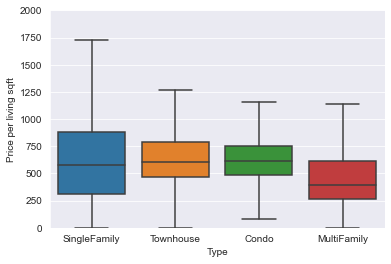

In [265]:
common_types = data_df['Type'].isin(['SingleFamily', 'Condo', 'MultiFamily', 'Townhouse'])
data_df['Price per living sqft'] = data_df['Sold Price'] / data_df['Total interior livable area']
ax = sns.boxplot(x='Type', y='Price per living sqft', data=data_df[common_types], fliersize=0)
ax.set_ylim([0, 2000]);

Sale price per living sqft is often related with house locations. Let's check the price for the top 20 zip codes.

In [266]:
data_df['Zip'].value_counts()[:20]

95118    756
95135    755
94087    746
95124    744
95148    739
95127    725
95132    723
95129    720
94303    720
95014    720
94116    714
95032    712
95122    712
95120    707
95123    701
90043    699
94402    699
90047    697
95035    696
95051    692
Name: Zip, dtype: int64

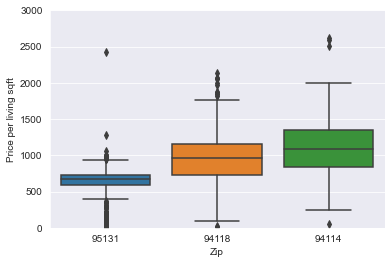

In [267]:
data_df['Zip'] = data_df['Zip'].astype('string')
data_df['Price per living sqft'] = data_df['Sold Price'] / data_df['Total interior livable area']
mask = data_df['Zip'].isin(['95131','94114', '94118'])
ax = sns.boxplot(x='Zip', y='Price per living sqft', data=data_df[mask])
ax.set_ylim([0, 3000]);

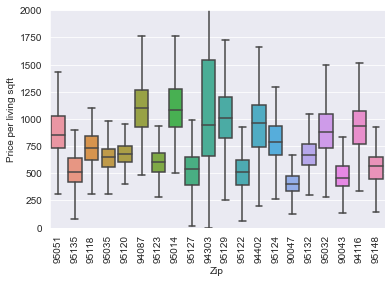

In [268]:
d = data_df[data_df['Zip'].isin(data_df['Zip'].value_counts()[:20].keys())]
ax = sns.boxplot(x='Zip', y='Price per living sqft', data=d, fliersize=0)
ax.set_ylim([0, 2000])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In some cases, we also need to check the correlations among multiple columns:
- as a way to measure colinearty
- visualize the correlation matrix as a heatmap

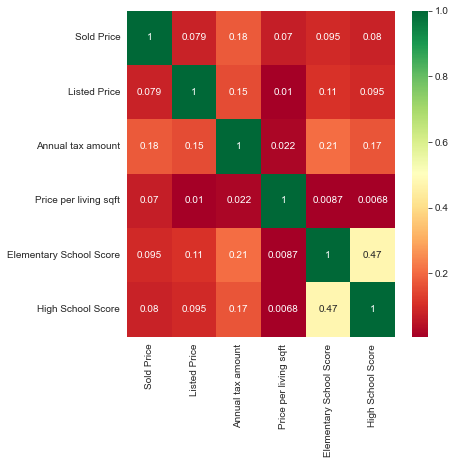

In [269]:
_, ax = plt.subplots(figsize=(6,6))
columns = ['Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft', 'Elementary School Score', 'High School Score']
sns.heatmap(data_df[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

According to the heat map, we can observe that:
- sold price is not closely correlated with the listed price
- sold price has some correlation with the annual tax amount



It is also observable that the listed price has some correlation with the listed price and also the elementary school score. It makes sense for the listed price to have some correlation with a tax information as the listed price should depend on the tax information (or vice versa). In a way, the elementary school score correlation also makes sense if they want to appeal to the families with children. If the marketing population is mostly families with children, having a listing price in correlation with the elementary school score is logical.

### Summary

This notebook demonstrates the basic technologies of doing data analysis for different data types, including

    - Data overview (understanding column data types, values, and distributions)
    - Data cleaning (remove missing values, outlier detection)
    - Data transformation (normalization, tokenization, lemmatization)
    - Feature engineering (encoding categorical data, text feature representation)
    - Understanding the interactions between columns (colinearty examination)

We only explored a small aspect of the data. You are welcome to dive deep into more details.